In [1]:
import nltk
import pandas as pd       
from pandas import DataFrame
from pandas import Series
import numpy as np
%pylab inline
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
#nltk.download()

Populating the interactive namespace from numpy and matplotlib


In [3]:
train = pd.read_csv("Train_rev1.csv", header=0)

In [7]:
train.df = pd.DataFrame(train)

In [8]:
firstk = train.df["FullDescription"][0:15000]

In [9]:
firstk = firstk.str.decode("utf-8")

In [10]:
all_desc_words = []
for desc in firstk:
    all_desc_words.append(desc)
all_desc_words = " ".join(all_desc_words)

In [11]:
tokens = nltk.word_tokenize(all_desc_words)

In [12]:
tokens_clean = [token for token in tokens if token.isalpha()]

In [13]:
pos_tags = nltk.pos_tag(tokens_clean)

KeyboardInterrupt: 

In [26]:
pos_list = [tag[1] for tag in pos_tags]
pos_list = Series(pos_list)

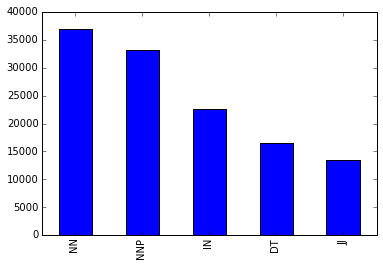

In [27]:
pos_list.value_counts()[0:5].plot(kind = "bar")

In [28]:
tokens_series = Series(tokens_clean)

In [29]:
ranks = [i+1 for i in range(100)]

In [32]:
top100 = list(tokens_series.value_counts()[:100])

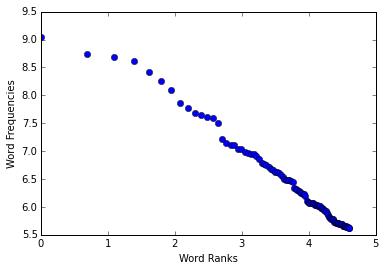

In [36]:
plt.plot([math.log(i) for i in ranks], [math.log(z) for z in top100],'o')
plt.xlabel("Word Ranks")
plt.ylabel("Word Frequencies")

In [38]:
nostop = [word for word in tokens_series if word not in stopwords.words('english')]

In [40]:
lmtzr = WordNetLemmatizer()

In [41]:
nostoplmtzed = [lmtzr.lemmatize(word) for word in nostop]

In [42]:
Series(nostoplmtzed).value_counts()[:10]

care          2002
home          1222
The           1222
experience    1154
work          1140
Care          1043
within        1035
Manager       1005
working        876
looking        852
dtype: int64